# Metadata of an Acoustic Monitoring Project

## Sounds of the Rainforest
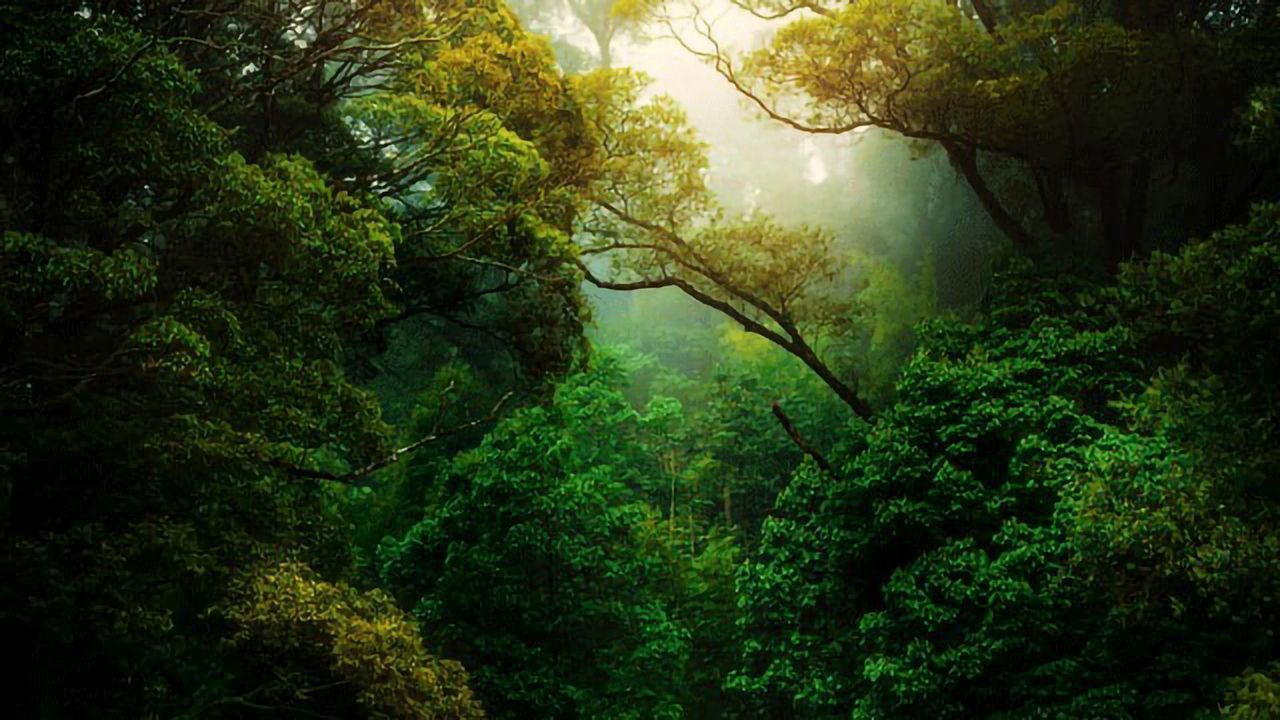
img_source: https://assets.technologynetworks.com/production/dynamic/images/content/341236/40-of-the-amazon-rainforest-is-at-tipping-point-to-becoming-savanna-341236-1280x720.jpg?cb=10921432

Tropical forests are the world's most biodiverse ecosystems, supporting and providing a home to thousands of animal and plant species. For scientists studying the effects of human pressures on ecosystem health, and in order to ensure the protection of rare species, it is necessary to keep track of the wildlife that lives in these regions.

Biodiversity monitoring has been commonly done manually by highly trained professionals who have the skills to recognize animals in the forest by sight or sound. Over a time period of months or years, a dataset of all the animals observed at a specific location in the forest can be compiled. Even though this is an established and tested procedure, it is costly, time consuming, and prone to human bias.

SAFE Acoustics is an interdisciplinary research project in which cutting-edge engineering and machine learning developments are used to fully automate biodiversity monitoring in Borneo's tropical forests. This is done by listening to the animals' sounds.

At the SAFE project research site in Sabah, Malaysia, they created real-time acoustic monitoring units and have deployed them in a network across varied levels of forest degradation. Some of their recorders are located in primary forest that has been greatly unaffected by humans, whereas others are located in logged forests and even in commercial oil-palm plantations.

source: http://acoustics.safeproject.net/about


## Exploratory Data Analysis of SAFE acoustic monitoring dataset

"This dataset contains a series of 20 minute avifaunal and herpetofaunal point counts conducted throughout the SAFE landscape across a land degradation gradient. Point counts were spread evenly throughout the 24 hours of the day. Associated with each point count is an audio recording file, so (theoretically) this could be used as a training dataset for automated bioacoustic studies. Jani Sleutel was responsible for avifaunal surveys and Adi Shabrani / Nursyamin Zulkifli for herpetofaunal data. This experiment was primarily designed by Sarab Sethi and Rob Ewers as part of the WWF Biome Health project."

The data was collected by installing prototype hardware systems(consisting of a Raspberry Pi, an electret microphone, an external audio card, a 3G data dongle, a solar panel and a battery) in the forest at Maliau (Sabah, Malaysia) and at SAFE. Microphones were installed in the tree canopy, using poles to extend the solar panel arrays beyond the shade of the canopy and ensuring continuous charging. Using lower quality audio allowed them to make use of slower mobile internet connections as well as reducing overall battery consumption of the system. They selected sites that had adequate mobile coverage. Acoustic data was transferred to servers in the UK via the mobile network. Celcom was used for data transfers, as previous field trials have demonstrated a consistent upload speed of > 1 Mbps can be achieved from ridges and south facing slopes. They expected to install up to 15 microphones to provide continuous acoustic data from sites that vary in terms of historical logging intensity and in future forest fragments that vary in size from one to 100 ha.

sources: https://www.zenodo.org/record/3997172#.Yj7Xu-fMI2z, https://www.safeproject.net/projects/project_view/175

#### My initial plans for this project was to explore the data to determine if birds sing differently in different locations. However, upon reaching the audio analysis part to answer the question, I've come to realize how noisy the audio files of the dataset are and how difficult it would be to analyze them. There were so many birds of different species singing in each audio file with lots of noises that it was at times difficult to spot where the bird I was analyzing was recorded in the file; and when it was spotted, the audio was only a couple seconds long so I didn't have much to work with. 
#### As a result, this project no longer tries to answer whether birds sing differently in different locations. Instead, this project is an exploratory data analysis project that will explore the metadata, look for patterns in it, and try to summarize and represent them.

## Data Preparation

In [2]:
# Import relevant libraries
import pandas as pd # loading and manipulating data
%matplotlib inline
import matplotlib.pyplot as plt # for visualization
import numpy as np # working with arrays/performing statistical analysis
import seaborn as sns # making statistical graphics/visualizations
import folium # plotting maps

In [3]:
## Create dataframes for the metadata

# Dataframe for excel file
df = pd.ExcelFile(r'Metadata/Sarab_point_count_data_SAFE_formatted_aug_2020.xlsx')

# Dataframe for Point_count_recordings sheet (Audio files and collection)
pcr = pd.read_excel(df, sheet_name="Point_count_recordings")

# Dataframe for Point_count_data sheet (Animals visually and audibly observed)
pcd = pd.read_excel(df, sheet_name="Point_count_data")

# Dataframe for Audio_moths sheet (Location and collection of recorder)
audio = pd.read_excel(df, sheet_name="Audio_moths")

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # This tells Jupyter to print the results for any variable or statement on it’s own line.

## Explore data by looking at first few rows of each dataset
pcr.head()
pcd.head()
audio.head()

,field_type,ID,Location,ID.1,Categorical,Date,Time,Date.1,Time.1,Comments
0,description,Point count location,Location in the SAFE landscape,Audio file ID,Location of recorder,Date the recorder was placed in forest,Time the recorder was set up in forest,Date the recorder was collected,Time the recorder was collected,Notes
1,levels,NaN,NaN,NaN,10m further; recorder tree; close to recorder ...,NaN,NaN,NaN,NaN,NaN
2,units,NaN,NaN,NaN,NaN,dd/mm/yyyy,hh:mm:ss,dd/mm/yyyy,hh:mm:ss,NaN
3,method,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,field_name,Audio_file,Site,Audio_moth_ID,Tree,Setup_date,Setup_time,Collect_date,Collect_time,Notes


The column titles are not very descriptive of the values, and the first 5 rows are describing the values in the columns. I want to replace the column names with the row that describes the column values best, and remove the other 4 rows to clean the data.

In [5]:
# Replace the column names with the row that describes the column values best
pcr.columns = pcr.iloc[3]
pcd.columns = pcd.iloc[4]
audio.columns = audio.iloc[4]

# Remove irrelevant rows and save the dataframe
pcr = pcr.drop(pcr.index[:4])
pcr = pcr.drop(columns=["Adi_Syamin" , "Jani"]) # Remove unnecessary columns
pcd = pcd.drop(pcd.index[:5])
audio = audio.drop(audio.index[:5])

# Print first few rows of each dataframe
pcr.head()
pcd.head()
audio.head()

3,field_name,Point_count_ID,Audio_file,Site,Date,Time,Weather,Notes
4,1,18_03_06_1,PC0000_0003,E100 edge,2018-03-06 00:00:00,10:15:00,sun,NaN
5,2,18_03_06_2,PC0000_0004,E100 edge,2018-03-06 00:00:00,11:00:00,sun,NaN
6,3,18_03_06_3,PC0000_0005,E100 edge,2018-03-06 00:00:00,12:00:00,sun,NaN
7,4,18_03_06_4,PC0000_0006,E100 edge,2018-03-06 00:00:00,13:00:00,sun,NaN
8,5,18_03_06_5,PC0000_0007,E100 edge,2018-03-06 00:00:00,14:00:00,sun,NaN


4,field_name,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual,Notes
5,1,18_03_06_1,E100 edge,NaN,10,00:00:00,10:15:00,A,Shwit ... Shwit ... Shwit irregularly repeated...
6,2,18_03_06_1,E100 edge,Fluffy-backed Tit-babbler,NaN,00:00:07,10:15:07,A,NaN
7,3,18_03_06_1,E100 edge,Blue-eared Barbet,60,00:00:37,10:15:37,A,also at 12:24
8,4,18_03_06_1,E100 edge,Chestnut-winged Babbler,100,00:00:50,10:15:50,A,NaN
9,5,18_03_06_1,E100 edge,Blue-eared Barbet,30,00:00:54,10:15:54,A,NaN


4,field_name,Audio_file,Site,Audio_moth_ID,Tree,Setup_date,Setup_time,Collect_date,Collect_time,Notes
5,1,AM0008A,B1,AM3,recorder tree,2019-01-04 00:00:00,20:45:00,2019-01-09 00:00:00,21:25:00,second not possible due to flooding rain
6,2,AM0003A,D100 641,AM11,recorder tree,2018-12-24 00:00:00,12:20:00,2018-12-27 00:00:00,21:35:00,NaN
7,3,AM0013B,B1,AM6,10m further,2019-01-10 00:00:00,02:45:00,2019-01-22 00:00:00,03:38:00,casing wrongly assembled when pick up
8,4,AM0003B,D100 641,AM13,10m further,2018-12-24 00:00:00,12:20:00,2018-12-27 00:00:00,21:35:00,NaN
9,5,AM0004A,D Matrix,AM13,recorder tree,2018-12-28 00:00:00,03:55:00,2018-12-31 00:00:00,10:32:00,NaN


Now that the data is clearer and more easily read, I would like to explore which species has the most data counts in the 'point count data' dataframe.

### How Many Species were Observed and Which Species has the Most Data Counts?

First I need to see if there's any missing values in the species' names and remove those since knowing the name of the species is important.

In [6]:
# Count the number of NaNs in each column
pcd.isna().sum()

4
field_name                0
Point_count_ID           69
Site                     79
Species_common_name     939
Est_distance           1193
PC_time                 470
Time_of_day             538
Audio_visual           1367
Notes                  9636
dtype: int64

In [7]:
# Remove the rows in the DataFrame that contain missing species name & location and save the dataframe.
pcd = pcd.dropna(subset=["Species_common_name" and "Site"])

# Count each species in the column to see which species has the most data counts
total_counts = pcd["Species_common_name"].value_counts()
total_counts

Bold-striped Tit-babbler     701
Yellow-vented Bulbul         595
House Gecko                  486
Human noise                  400
Yellow-bellied Prinia        398
                            ... 
Spiderhunter                   1
Thick-billed Flowerpecker      1
Bornean Blue Flycatcher        1
Rufous-backed Kingfisher       1
Mouse Deer                     1
Name: Species_common_name, Length: 315, dtype: int64

In [8]:
# Plot the top 10 species with their data counts


- 315 different species were observed in the dataset.
- The Bold-striped Tit-Babbler has the most data counts (701 counts), followed by the Yellow-vented Bulbul (595 counts) and House Gecko (486 counts).
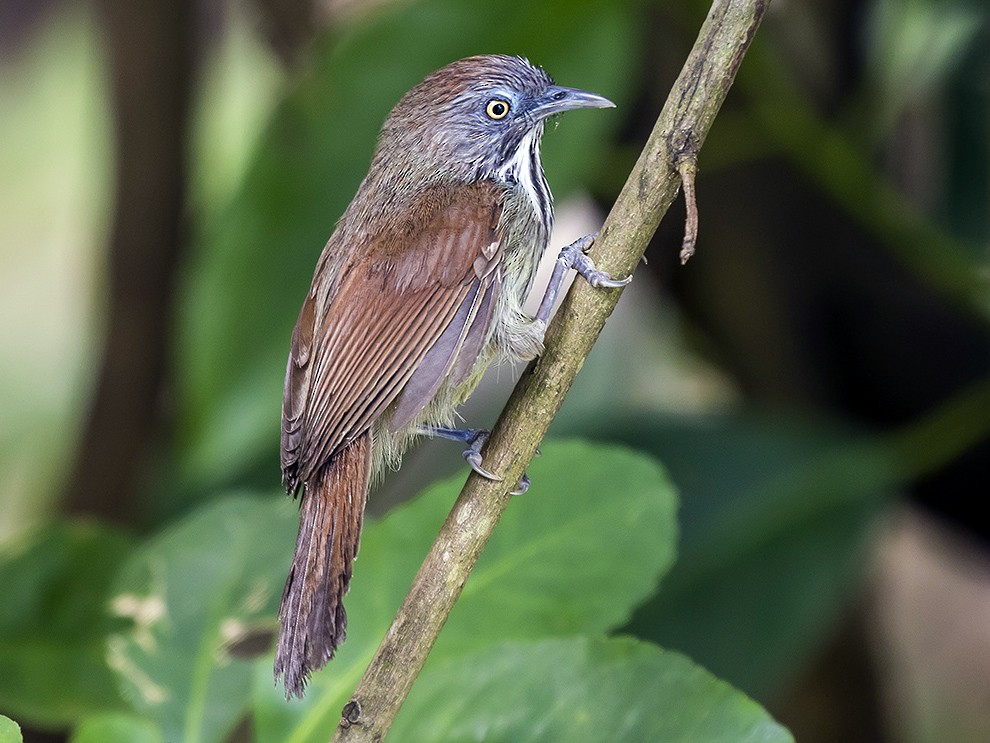
- Picture of Bold-striped Tit-Babbler
img_source: https://cdn.download.ams.birds.cornell.edu/api/v1/asset/238083621/1800

### The Locations With the Most Data Where the Bold-striped Tit-Babbler Was Located

In [40]:
# Count each location in the column to see which location has the most point count data
total_pcd = pcd["Site"].value_counts() 
total_pcd

# Count locations where Bold-striped Tit-Babbler has point count data
pcd[pcd["Species_common_name"] == "Bold-striped Tit-babbler"]["Site"].value_counts()

C Matrix      1314
OP Belian     1250
C10 621       1196
D Matrix      1190
OP3 843       1089
D100 641       906
VJR 1          889
VJR 2          878
E1 648         839
E100 edge      796
B10            747
B1 602         686
Riparian 1     648
Riparian 2     446
LFE river       32
Name: Site, dtype: int64

D Matrix     129
OP3 843      121
OP Belian    108
C Matrix     101
C10 621       84
E1 648        43
E100 edge     38
B10           38
D100 641      37
B1 602         1
VJR 1          1
Name: Site, dtype: int64


The locations with the most point count data are C Matrix (1314 counts) and OP Belian (1250 counts), but the locations where the Bold-striped Tit-babbler was located the most are D Matrix (129 counts) and OP3 843 (121 counts).


The point counts show the species that have been observed either visually or audibly or both. Let's see which locations have the most point count recordings available (recordings of species that have been observed audibly or visually AND audibly) using the point count recordings dataset.

In [10]:
# Count the number of NaNs in each column
pcr.isna().sum()

3
field_name           0
Point_count_ID       1
Audio_file          22
Site                 0
Date                 0
Time                 5
Weather             46
Notes             1386
dtype: int64

In [11]:
# Remove the rows in the DataFrame that contain missing audio files and save the dataframe.
pcr = pcr.dropna(subset=["Audio_file"])

# Count each location in the column to see which location has the most recording counts
total_recordings = pcr["Site"].value_counts()
total_recordings

B1 602        121
OP Belian     119
E100 edge     112
D100 641      107
B10           106
Riparian 2    106
OP3 843       106
Riparian 1    102
D Matrix      102
VJR 1         101
C10 621        97
VJR 2          96
E1 648         95
C Matrix       84
LFE river       6
Name: Site, dtype: int64

The location with the most point count recordings is B1 602 with 121 counts. 

Let's plot a map with the locations where all the species were observed and a map with the locations where the Bold-striped Tit-babbler was observed.

### Mapping the Locations where the Species were Observed

The 'Locations' sheet in the Excel file contains the location names with their latitude and longitude which is necessary to be able to plot them on a map. I'll use that information to visualize where the species were observed.

In [79]:
# Read the 'Locations' data and insert it in a DataFrame
locations = pd.read_excel(df, sheet_name="Locations")

# Look at the information of the data
locations.info()

# Look at the first few rows of the data
locations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location name      26 non-null     object 
 1   New                26 non-null     object 
 2   Latitude           26 non-null     float64
 3   Longitude          26 non-null     float64
 4   Type               26 non-null     object 
 5   Elevation          26 non-null     int64  
 6   ET before arrival  24 non-null     object 
 7   Notes              4 non-null      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.8+ KB


,Location name,New,Latitude,Longitude,Type,Elevation,ET before arrival,Notes
0,E100 edge,yes,4.68392,117.58604,Transect,379,"30 minutes drive, 1.5 hour walk",covered by leaves
1,D100 641,yes,4.71129,117.58753,Transect,479,"20 minutes drive, 30 minutes walk",NaN
2,C10 621,yes,4.71118,117.61899,Transect,403,"15 minutes drive, 45 minutes walk",NaN
3,B10,yes,4.72747,117.61433,Transect,352,takes only 30min to get there (walk + car),NaN
4,E1 648,yes,4.69372,117.58118,Transect,428,"30 minutes drive, 30 minutes walk",NaN


In [80]:
# Remove the 'New', ET before arrival', and 'Notes' columns from the location dataframe then print the first 5 rows
locations.drop(['New', 'ET before arrival', 'Notes'], axis=1).head()

,Location name,Latitude,Longitude,Type,Elevation
0,E100 edge,4.68392,117.58604,Transect,379
1,D100 641,4.71129,117.58753,Transect,479
2,C10 621,4.71118,117.61899,Transect,403
3,B10,4.72747,117.61433,Transect,352
4,E1 648,4.69372,117.58118,Transect,428


We have 26 locations in total. Let's plot them on a map so that we can visualize where these locations are.

In [81]:
# Plot a map of all the locations that have been observed whether they had point count data/point count recordings or not

title = 'Map of all locations observed'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(title)

locations_map = folium.Map(location=[4.70, 117.55], zoom_start=12, tiles="Stamen Terrain")

for i, row in locations.iterrows():
    coord = [row['Latitude'], row['Longitude']]
    folium.Marker(coord, popup= row['Location name'],
        icon=folium.Icon(icon='map-marker',
        color='red')).add_to(locations_map)

locations_map.get_root().html.add_child(folium.Element(title_html))

# Save map as html file
locations_map.save("locations_map.html")

# Display map
locations_map

In [112]:
# Plot a map of the locations that have point count data
files = [total_pcd, locations['Latitude'], locations['Longitude']]
pcd_locations = pd.concat(files, axis = 1)
pcd_locations

,Site,Latitude,Longitude
0,NaN,4.68392,117.58604
1,NaN,4.71129,117.58753
2,NaN,4.71118,117.61899
3,NaN,4.72747,117.61433
4,NaN,4.69372,117.58118
5,NaN,4.70272,117.59141
6,NaN,4.71011,117.61071
7,NaN,4.65041,117.54203
8,NaN,4.65278,117.54653
9,NaN,4.66443,117.53513
